# Inferencia estadística

conclusiones basadas en datos provenientes de un muestreo aleatorio.

    Quién va a ser presidente? 

    Quién escribió estos libros? 

Preguntas se reducen a la estimación de un número: el % de votantes. 

Estimación de un valor desconocido. Dos cosas diferentes: 

            La estimación y 
               
            el valor real. 
            

El valor real es fijo. La estimación depende del muestreo! Hay que tomar en cuenta los otros posibles resultados del muestreo y para eso usamos estadística. 

Hay que asumir cosas.

Estimar cantidad de buses en Quito para saber si necesitamos mas:

Tienen un número! 
    
    Supongamos que es un número serial: 1,2,...,N.
    No conocemos N.
    Queremos estiamar N usando los buses que vemos en la calle. 
    
    Vamos a asumir que los números que vemos en los buses son una muestra uniforme aleatoria de 1,2,...,N.
    

## Dos preguntas: 

Si vemos 25 15 178 190 205 255, cómo estimar N? 

Podemos usar el max!

Pero qué tan cerca está el max? Y qué tan probable es ese número de buses?


### Opción 1:

Calcular las probas y dibujar un histograma. 

### Opción 2:

Simular y dibujar el histograma empírico.


El histograma empírico se va a parecer al histograma real si hacemos una simulación grande. 

In [1]:
library(ggplot2)

Nbuses = 500

rep = 10000
maxSerial <- {}

for(i in 1:rep){
    numSerie <- sample(x = 1:Nbuses, size = 30, replace = TRUE)
    maxSerial[i] <- max(numSerie)
}

maxSerial <- data.frame(max = maxSerial)
#maxSerial

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


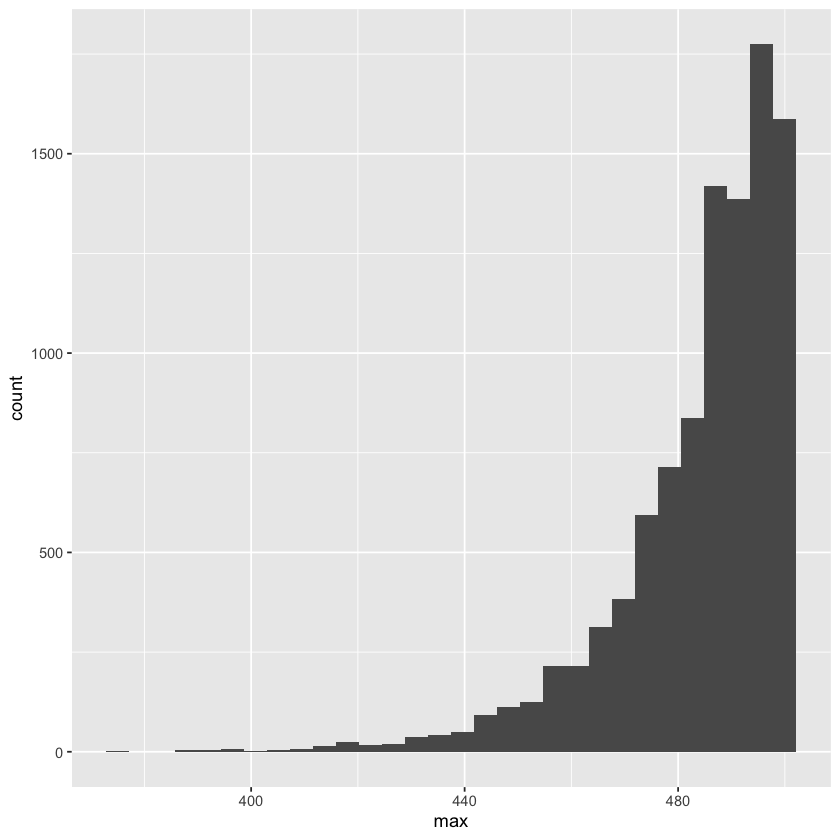

In [2]:
ggplot(maxSerial, aes(x=max)) + geom_histogram()

# errores solo  pueden ser menores que el max!
# además el histograma estó concentrado cerca del max. 

## Otra forma: usar el promedio y multiplicar por 2! Es mas fácil de manipular matemáticamente. 

Este puede sobreestimar. 

In [4]:
N <- 500
rep <- 10000

meanSerial <- vector()

for(i in 1:rep){
    numSerie <- sample(x = 1:N, size = 30, replace = TRUE)
    meanSerial[i] <- mean(numSerie)
}


meanSerial <- data.frame(mean = 2*meanSerial)
meanSerial

mean
440.3333
474.1333
512.8000
468.4667
572.8000
430.2000
477.9333
558.2667
480.2000
533.8667


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


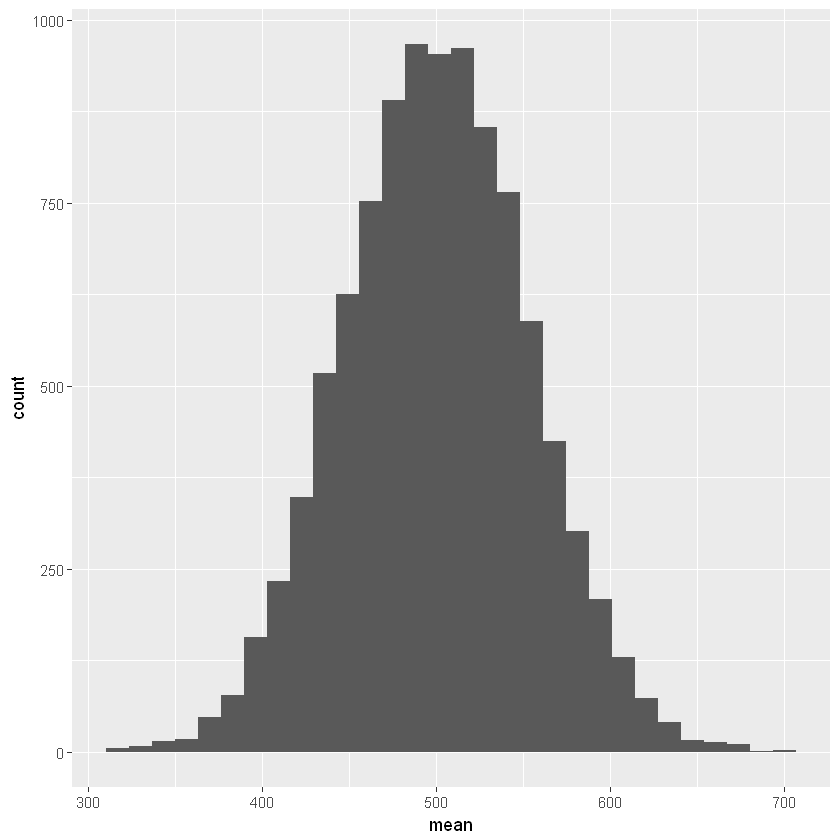

In [5]:
ggplot(meanSerial, aes(x=mean)) + geom_histogram()

In [12]:
head(meanSerial)
head(maxSerial)

Buses <- data.frame(mean = meanSerial$mean, max = maxSerial$max)
head(Buses)

mean
440.3333
474.1333
512.8000
468.4667
572.8000
430.2000


max
474
500
500
496
497
490


mean,max
440.3333,474
474.1333,500
512.8000,500
468.4667,496
572.8000,497
430.2000,490


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


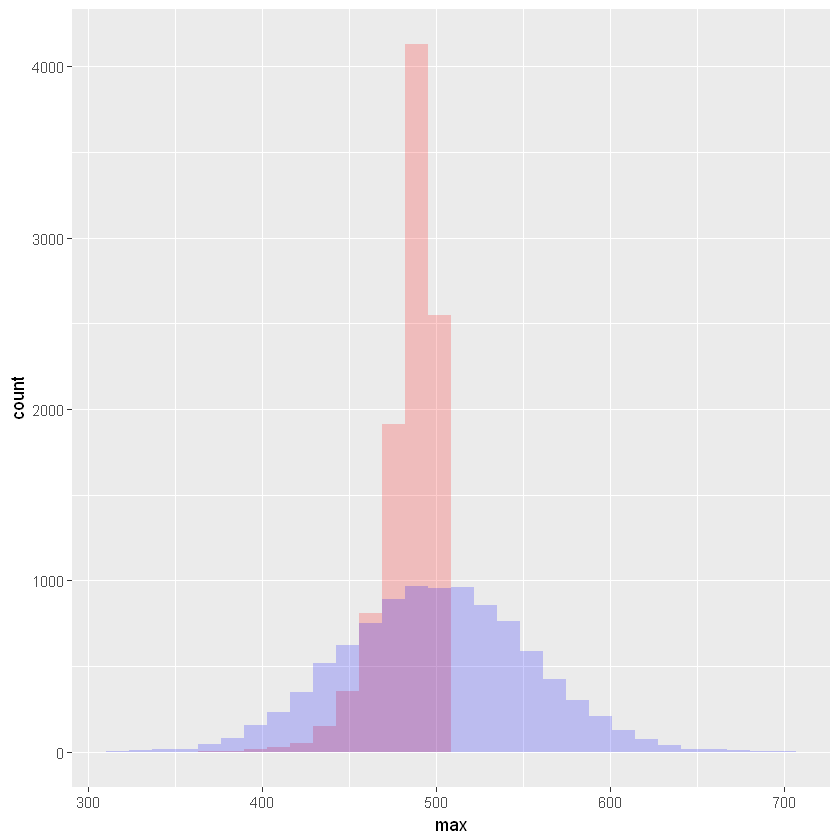

In [14]:
ggplot(Buses) + geom_histogram(aes(x=max), fill="red", alpha=0.2) +
                geom_histogram(aes(x=mean), fill="blue", alpha=0.2)

# Cómo podemos ver el bias?

La mitad! Es lo que queremos estimar. En promedio el azul es mejor: no tiene bias.  

# Cómo podemos ver la variabilidad?

Qué tanto ancho es el histograma? El rojo es mejor. Ademas es mas alto: Está mas concentrado alrededor de N=500.


# Trade-off Variabilidad y Bias

low bias high variability and vice-versa. 

Cuál usar? Depende de lo que les interese. En este caso el azul tiene bias pequeño: Tenemos una estimación mas cercana a la realidad. Pero si el problema son los recursos tal vez es mejor no sobreestimar el número de buses. 


# Promedio

In [2]:
plata <- c(3, 3, 4, 4, 4, 4, 5, 5)

mean(plata)
sum(plata)/length(plata)

[1] 4

[1] 4

Si reparto 4, todos van a tener lo mismo. Un promedio iguala. En mate, un promedio suaviza funciones con saltos. 

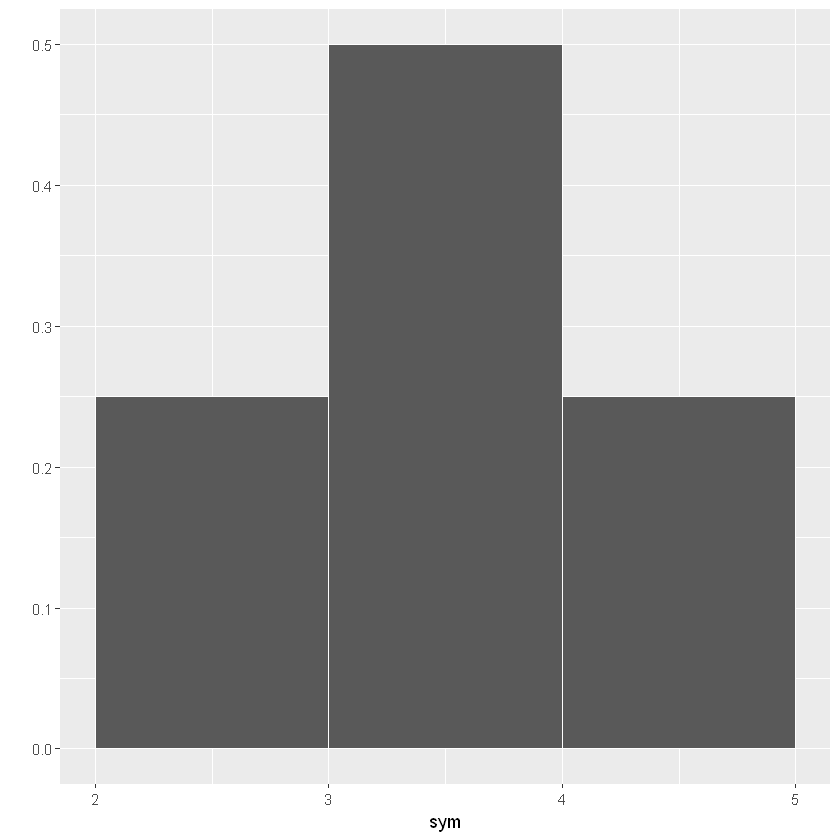

In [7]:
library(ggplot2)
sym <- data.frame(sym=plata)
ggplot(sym, aes(sym)) + geom_histogram(aes(y=..count../sum(..count..)), breaks=seq(2, 5, by=1), color="white") + ylab("")

El promedio no siempre está en la mitad: la media divide los datos en la mitad. 

[1] 5.25

[1] 4

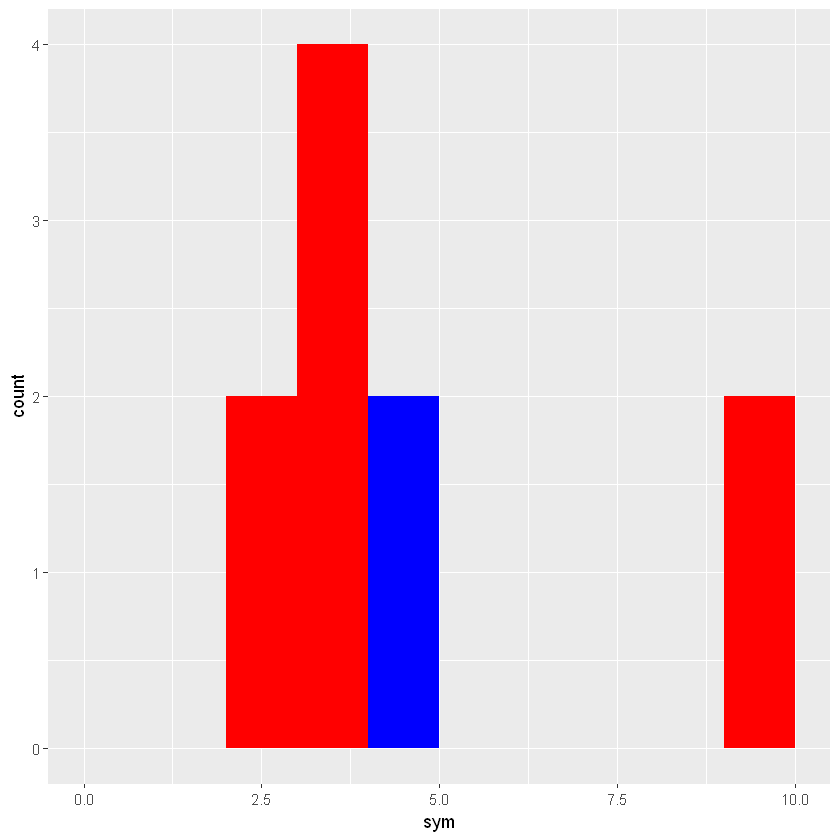

In [23]:
asym <- c(3, 3, 4, 4, 4, 4, 10, 10)

asym <- data.frame(asym=asym)

dists <- cbind(sym, asym)

ggplot(dists) + geom_histogram(aes(sym), breaks=0:max(sym), alpha=1, fill = "blue") +
        geom_histogram(aes(asym), breaks=0:max(asym), alpha=1, fill = "red") 
        

mean(asym$asym)
median(asym$asym)

# Variabilidad


Verein,Name,Pos,Spec,PosSpec,Age,Age.group,cm,kg,BMI,...,Off,Dis,Trn,A.1,KP.1,Avg.P,PS.,C,LB,TB
Wolfsburg,Ashkan Dejagah,AM,C,AM(C),27,bis 30,181,77,23.50356,...,-,2,3,-,2,26,73.1,2,2,-
Wolfsburg,Ashkan Dejagah,AM,C,AM(C),27,bis 30,181,77,23.50356,...,-,2,3,-,2,26,73.1,2,2,-
Nürnberg,Marcos Antonio,D,,D,30,bis 30,187,87,24.87918,...,-,-,-,-,-,20,90,-,2,-
Wolfsburg,Ashkan Dejagah,FW,,FW,27,bis 30,181,77,23.50356,...,-,2,3,-,2,26,73.1,2,2,-
Düsseldorf,Christian Weber,M,,M,29,bis 30,175,72,23.51020,...,-,-,-,-,1,35,85.7,1,4,-
Freiburg,Sebastian Kerk,M,,M,19,bis 20,185,75,21.91381,...,1,3,-,-,-,28,82.1,-,1,-


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


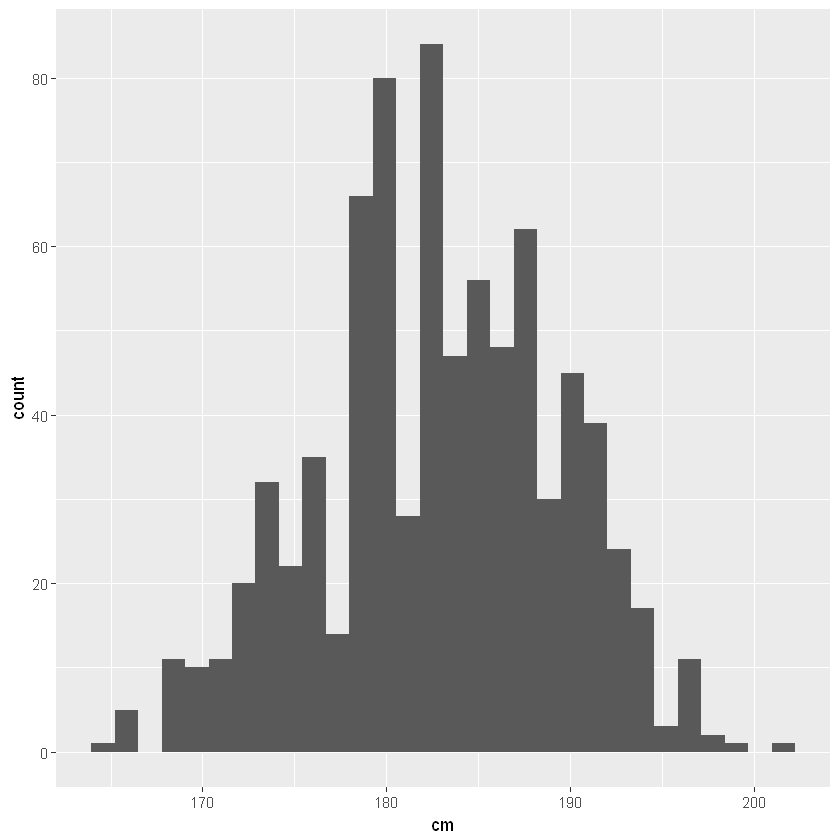

In [24]:
jugadores <- read.table(file = "../../Tables/Bundesliga-Spieler-All-Data_Pos_App.csv", header = T, sep = ";")
head(jugadores)

ggplot(jugadores) + geom_histogram(aes(cm))

## Candidato 1: valor mas grande - mas pequeño.

Lo bueno: Fácil de interpretar.

Problemas: Un punto puede afectar la medida. No sabes dónde están el resto de los valores. 

Usemos el centro:

## Candidato 2: la variación alrededor del centro(promedio).


In [26]:
library(dplyr)

nums <- data.frame(num = c(1, 2, 2, 10))

mean(nums$num)

[1] 3.75

In [28]:
nums <- nums %>% mutate(dif = num - mean(nums$num))

nums

num,dif
1,-2.75
2,-1.75
2,-1.75
10,6.25


In [29]:
mean(nums$dif) # 0 es un problema...

[1] 0

In [119]:
# El problema es el signp de dif. tenemos dos opciones: abs y ()^2

nums <- nums %>% mutate(var = (num - mean(nums$num))^2)

mean(nums$var)

# está bien pero no tiene las mimas dimensiones
sqrt(mean(nums$var))


[1] 13.1875

[1] 3.63146

promedio -> dist al promedio -> sqrt() para tener las buenas dims

Name,Pos,Age,cm,kg
Ashkan Dejagah,AM,27,181,77
Ashkan Dejagah,AM,27,181,77
Marcos Antonio,D,30,187,87
Ashkan Dejagah,FW,27,181,77
Christian Weber,M,29,175,72
Sebastian Kerk,M,19,185,75


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


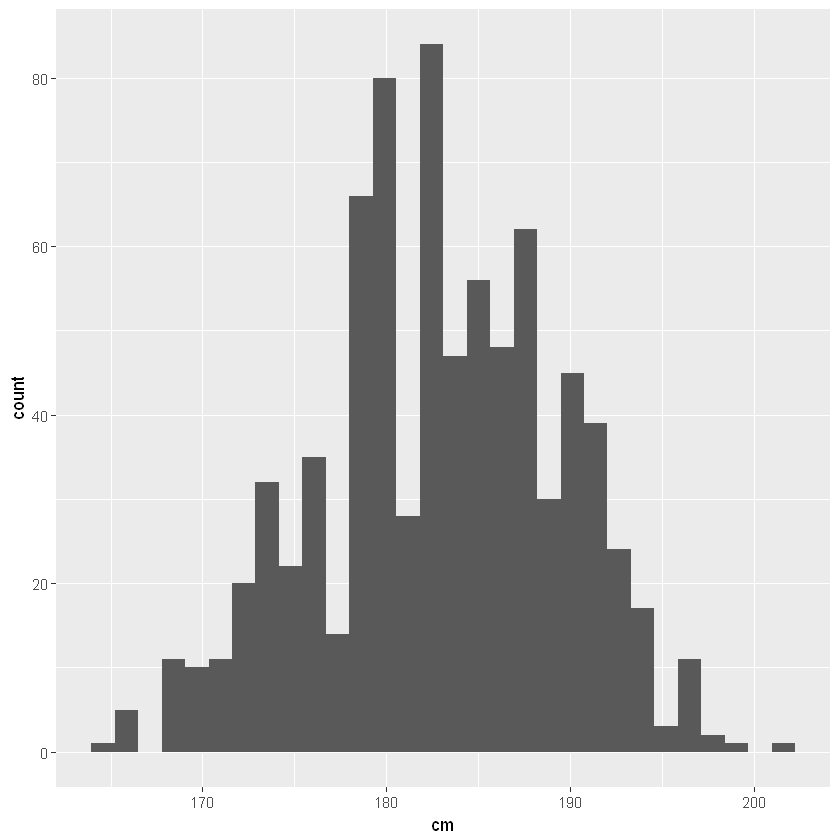

In [30]:
jugadores <- jugadores %>% select(Name, Pos, Age, cm, kg)

head(jugadores)

ggplot(jugadores) + geom_histogram(aes(cm))

In [31]:
mean(jugadores$cm)
sd(jugadores$cm)

# 182 con mas o menos 6.5 cms.

[1] 182.8882

[1] 6.526252

In [43]:
head(arrange(jugadores, desc(cm)))

# el mas alto mide 201

(201 - mean(jugadores$cm))/sd(jugadores$cm) # casi 3 veces sds mas allâ del promedio.


Name,Pos,Age,cm,kg
Jannik Löhden,D,24,201,97
Jannik Vestergaard,D,20,199,96
Lars Unnerstall,GK,23,198,100
Naldo,D,30,198,89
Benedikt Röcker,D,23,197,90
Daniel van Buyten,D,35,197,95


[1] 2.775223

In [140]:
# el mas bajo 164
head(arrange(jugadores, cm))

(164 - mean(jugadores$cm))/sd(jugadores$cm) # casi 3 veces sds menos del promedio.

Name,Pos,Age,cm,kg
Yohandry Orozco,M,22,164,55
Genki Omae,FW,23,166,67
Arthur Boka,D,30,166,67
Arthur Boka,D,30,166,67
Arthur Boka,DM,30,166,67
Arthur Boka,M,30,166,67


[1] -2.894188

[1] 25.46335

[1] 3.997538

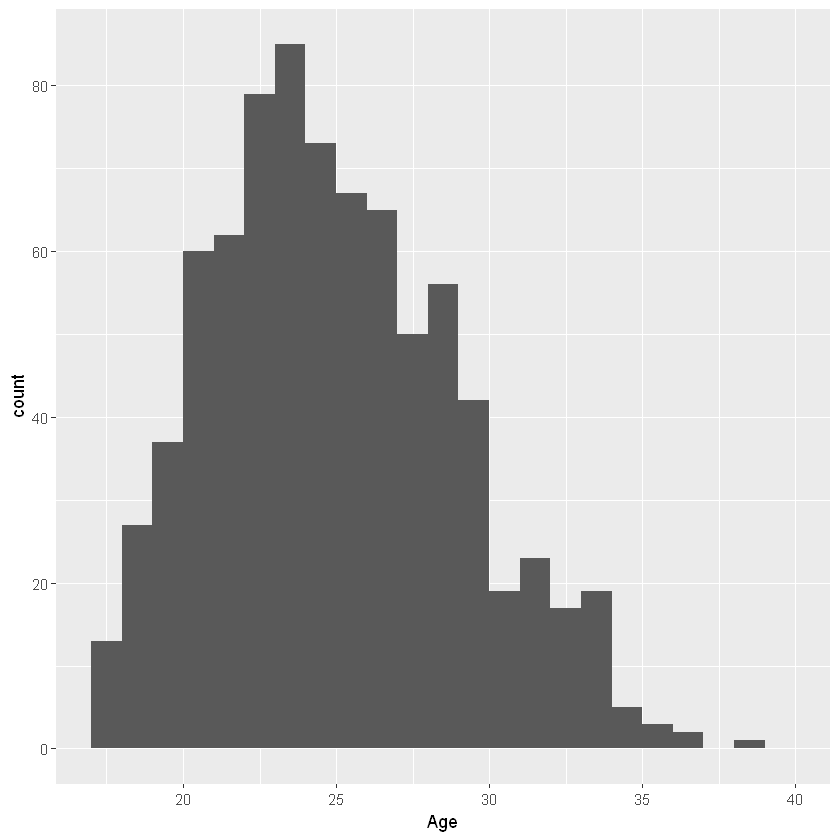

In [44]:
mean(jugadores$Age)
sd(jugadores$Age)

ggplot(jugadores) + geom_histogram(aes(Age), breaks=17:40)

In [154]:
# el mas joven
head(arrange(jugadores, Age))

(17 - mean(jugadores$Age))/sd(jugadores$Age) # casi 3 veces sds menos del promedio.

# el mas viejo
head(arrange(jugadores, desc(Age)))

(39 - mean(jugadores$Age))/sd(jugadores$Age) # casi 3 veces sds menos del promedio.

Name,Pos,Age,cm,kg
Pierre Höjbjerg,M,17,186,81
Max Meyer,M,17,169,65
Niklas Süle,D,17,194,91
Marc Stendera,M,17,171,64
Marc-Oliver Kempf,D,18,185,82
Cristian Ramirez,D,18,173,74


[1] -2.117142

Name,Pos,Age,cm,kg
Oka Nikolov,GK,39,187,86
Simon Jentzsch,GK,37,196,97
Marc Ziegler,GK,37,193,92
Alexander Manninger,GK,36,189,85
Jens Langeneke,D,36,185,78
Timmy Simons,DM,36,186,78


[1] 3.386246

## Los extremos están a algunos sd's de la media. 

Sin importar la forma de la distribución. La mayoría de los datos están a promedio +- algunas sd. 

Pero cuánto es la mayoría?

# Desigualdad de Chebyshev

La proporción de los datos en el rango promedio +- z*sd es

    por lo menos: 1 - 1/z^2
    
Para z = 2, la fracción es por lo menos 1 - 1/4 = 3/4 (el 75%). 

Para z = 5 tenemos por lo menos el 96%.

para z = 1 la proporción es por lo menos 0. 

z = 1/2? No es útil. Solo sirve cuando nos alejamos del promedio.

### z 

Cuantas unidades lejos del promedio. 

z puede ser negativo, debajo del promedio. 

z se llaman unidades estandar.  

z tipicamente está entre -5 y 5.

para convertir un valor en unidades standard: 

    (val - mean(val))/sd(val)
    

obs: sd difícil de ver en el histograma. 
    

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


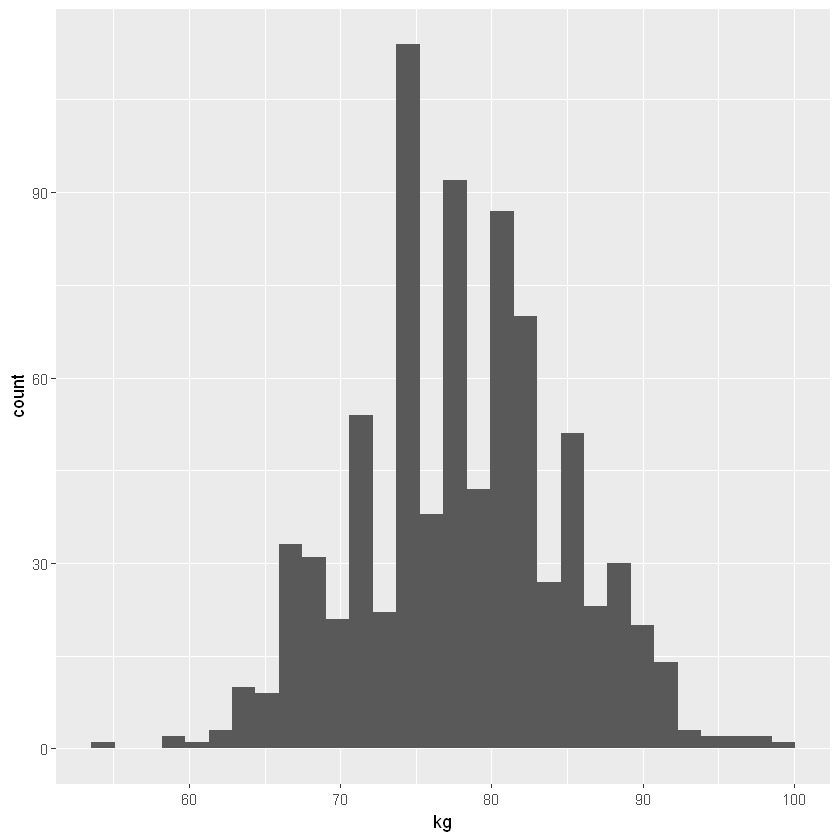

In [156]:
ggplot(jugadores) + geom_histogram(aes(kg))